<a href="https://colab.research.google.com/github/VasumathiBurugu/Heart-disease-detection/blob/master/HEART_DISEASE_DIAGNOSIS_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Heart Disease data.csv to Heart Disease data.csv


In [3]:
df = pd.read_csv('Heart Disease data.csv')

In [4]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

In [5]:
df.tail()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
1020      2   0     2       1  
1021      1   1     3       0  
1022      1   1     2       0  
1023      2   0     2       1  
1024      1   1     3       0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
df.describe()

age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000     0.000000     0.000000   
25%       0.000000     0.000000   132.000000     0.000000     0.000000   
50%       0.000000     1.000000   152.000000     0.000000     0.800000   
75%       0.000000     1.000000   166.000000     1.000000     1.800000   
max       1.000000     2.000000   202.000000     1.000000     6.200000   

             slope           ca         thal       target  
count  1025.000000  1025.000000  1025.000000  1025.000000  
mean      1.385366     0.754146     2.323902     0.513171  
std       0.617755     1.030798     0.620660     0.500070  
min       0.000000     0.000000     0.000000     0.000000  
25%       1.000000     0.000000     2.000000     0.000000  
50%       1.000000     0.000000     2.000000     1.000000  
75%       2.000000     1.000000     3.000000     1.000000  
max       2.000000     4.000000     3.000000     1.000000

In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<Axes: title={'center': 'Finding Null Values Using Heatmap\n'}>

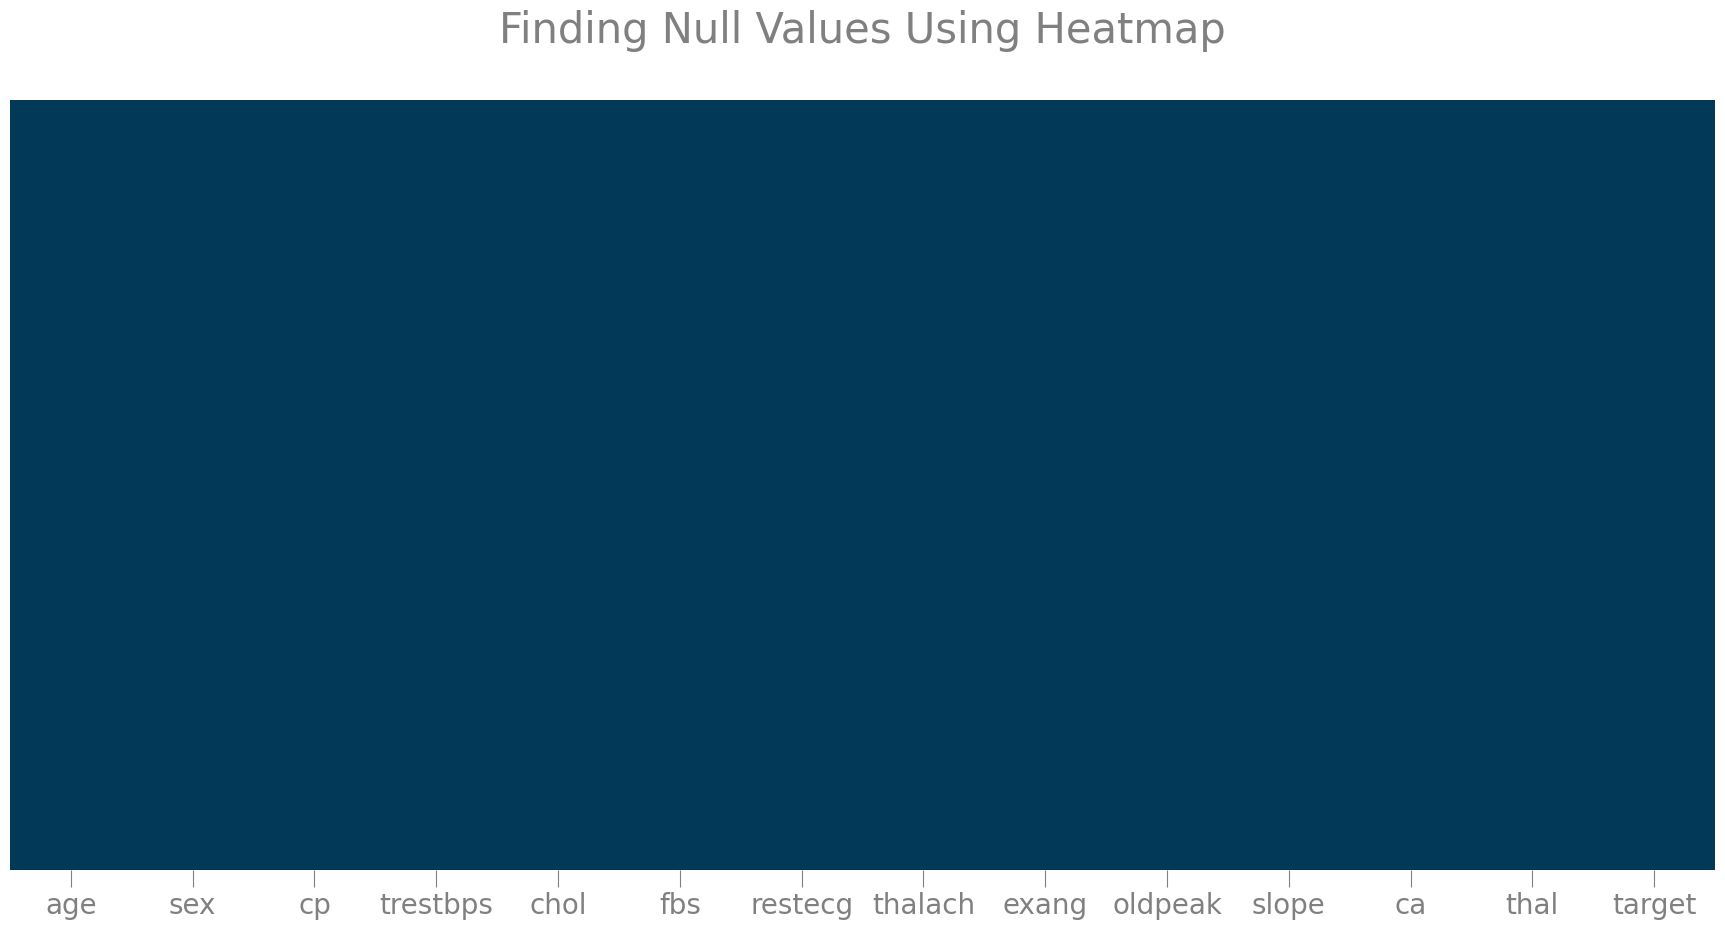

In [9]:
# visualizing null values if it exists
plt.figure(figsize=(22,10))

plt.xticks(size=20,color='grey')
plt.tick_params(size=12,color='grey')

plt.title('Finding Null Values Using Heatmap\n',color='grey',size=30)

sns.heatmap(df.isnull(),
            yticklabels=False,
            cbar=False,
            cmap='PuBu_r',
            )

In [10]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
file_path = 'Heart Disease data.csv'
df = pd.read_csv(file_path)
data =df.copy()
X = data.iloc[:,0:13]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(12,'Score'))  #print 10 best features

       Specs       Score
7    thalach  650.008493
9    oldpeak  253.653461
2         cp  217.823922
11        ca  210.625919
8      exang  130.470927
4       chol  110.723364
0        age   81.425368
3   trestbps   45.974069
10     slope   33.673948
1        sex   24.373650
12      thal   19.373465
6    restecg    9.739343


[0.07209264 0.05610341 0.13216351 0.06080798 0.0594367  0.01842254
 0.03351529 0.08495449 0.10834333 0.08982679 0.06320247 0.12956357
 0.09156728]


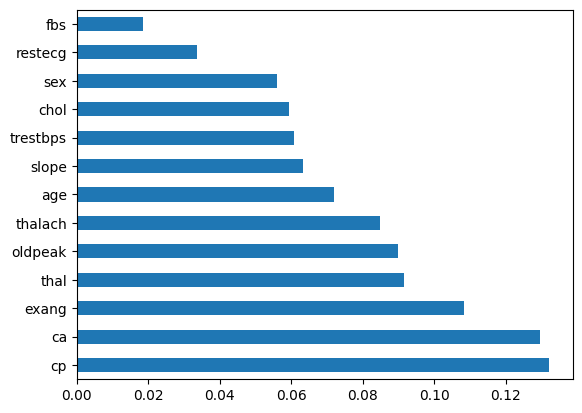

In [11]:

from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(13).plot(kind='barh')
plt.show()

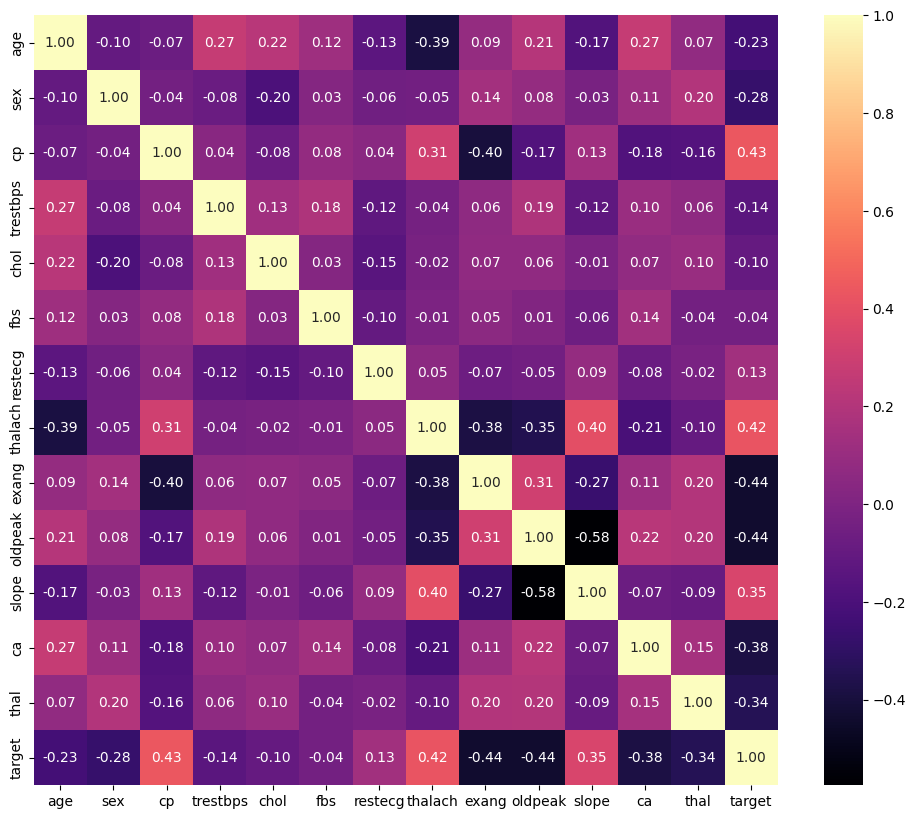

In [12]:
df = pd.read_csv('Heart Disease data.csv')  # Load the data into the 'df' DataFrame

df_subset = df.drop('target', axis=1)

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap="magma",fmt='.2f')
plt.show()

In [13]:
for i in df.columns:
    print(i,len(df[i].unique()))

age 41
sex 2
cp 4
trestbps 49
chol 152
fbs 2
restecg 3
thalach 91
exang 2
oldpeak 40
slope 3
ca 5
thal 4
target 2


In [14]:
sns.set_style('darkgrid')
sns.set_palette('Set2')

In [15]:
df2 = df.copy()

In [16]:
def chng(sex):
    if sex == 0:
        return 'female'
    else:
        return 'male'
df2['sex'] = df2['sex'].apply(chng)

In [17]:
def chng2(prob):
    if prob == 0:
        return 'Heart Disease'
    else:
        return 'No Heart Disease'
df2['target'] = df2['target'].apply(chng2)

Text(0.5, 1.0, 'Gender v/s target\n')

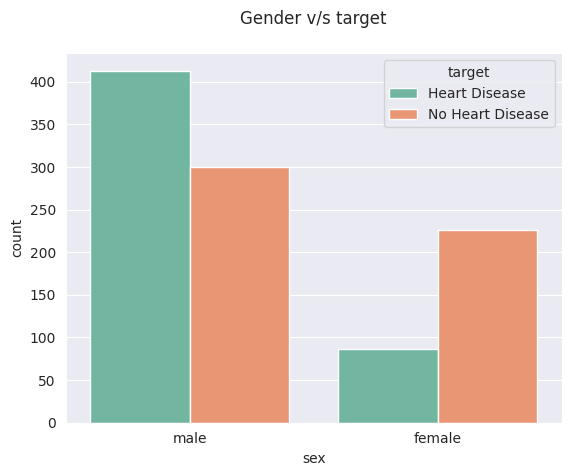

In [18]:
sns.countplot(data= df2, x='sex',hue='target')
plt.title('Gender v/s target\n')

Text(0.5, 1.0, 'Chest Pain Type v/s target\n')

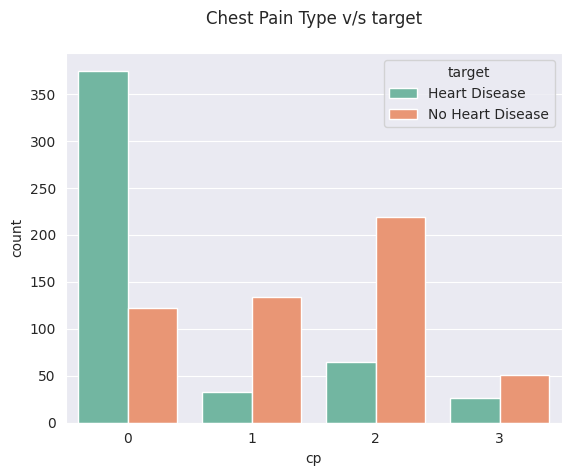

In [20]:
sns.countplot(data= df2, x='cp',hue='target')
plt.title('Chest Pain Type v/s target\n')

Thalassemia (thal-uh-SEE-me-uh) is an inherited blood disorder that causes your body to have less hemoglobin than normal. Hemoglobin enables red blood cells to carry oxygen


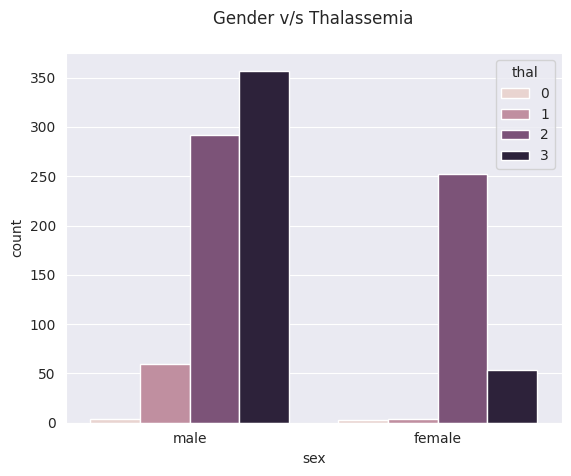

In [21]:
sns.countplot(data= df2, x='sex',hue='thal')
plt.title('Gender v/s Thalassemia\n')
print('Thalassemia (thal-uh-SEE-me-uh) is an inherited blood disorder that causes your body to have less hemoglobin than normal. Hemoglobin enables red blood cells to carry oxygen')

Text(0.5, 1.0, 'Slope v/s Target\n')

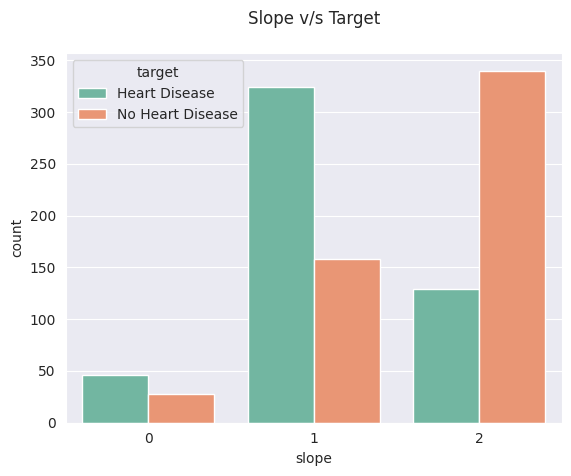

In [22]:
sns.countplot(data= df2, x='slope',hue='target')
plt.title('Slope v/s Target\n')

Text(0.5, 1.0, 'exang v/s Thalassemia\n')

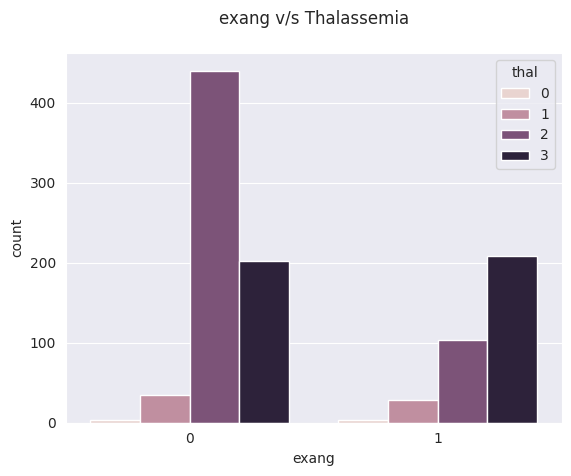

In [23]:
sns.countplot(data= df2, x='exang',hue='thal')
plt.title('exang v/s Thalassemia\n')

<ipython-input-24-ef2dfb73096e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['target']==0]['age'],kde=False,bins=50)


Text(0.5, 1.0, 'Age of Heart Diseased Patients\n')

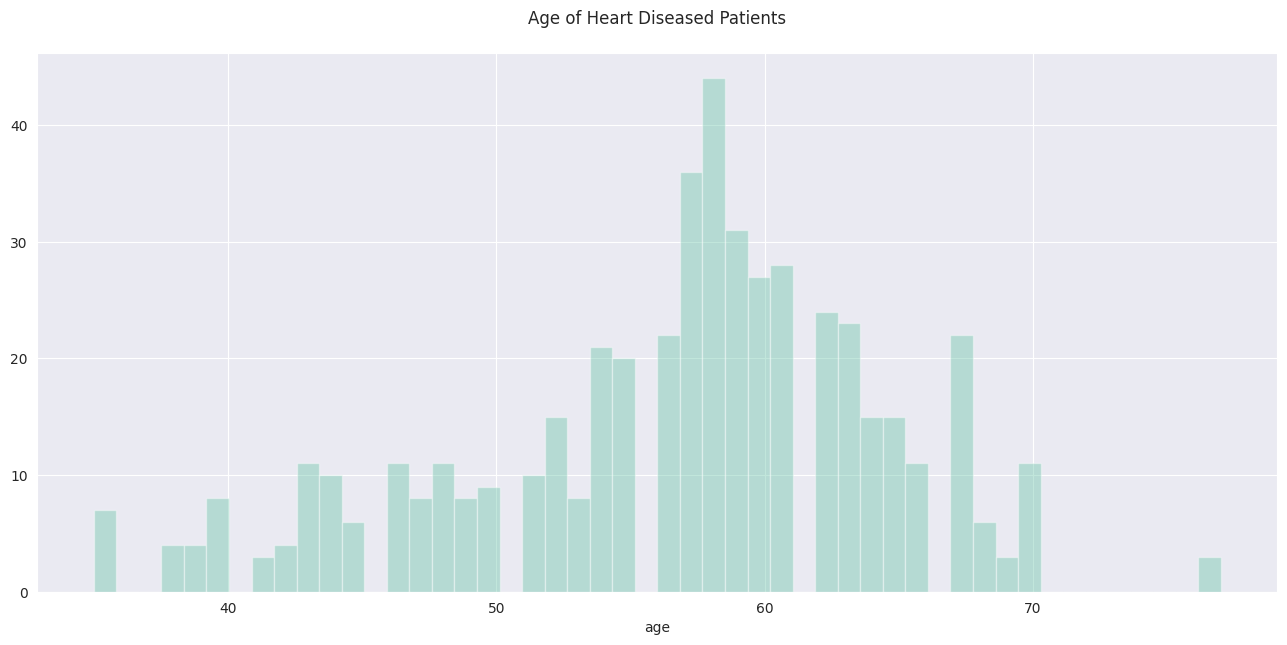

In [24]:
plt.figure(figsize=(16,7))
sns.distplot(df[df['target']==0]['age'],kde=False,bins=50)
plt.title('Age of Heart Diseased Patients\n')

<ipython-input-25-9dad39bdef40>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['target']==0]['chol'],kde=False,bins=40)


Text(0.5, 1.0, 'Chol of Heart Diseased Patients\n')

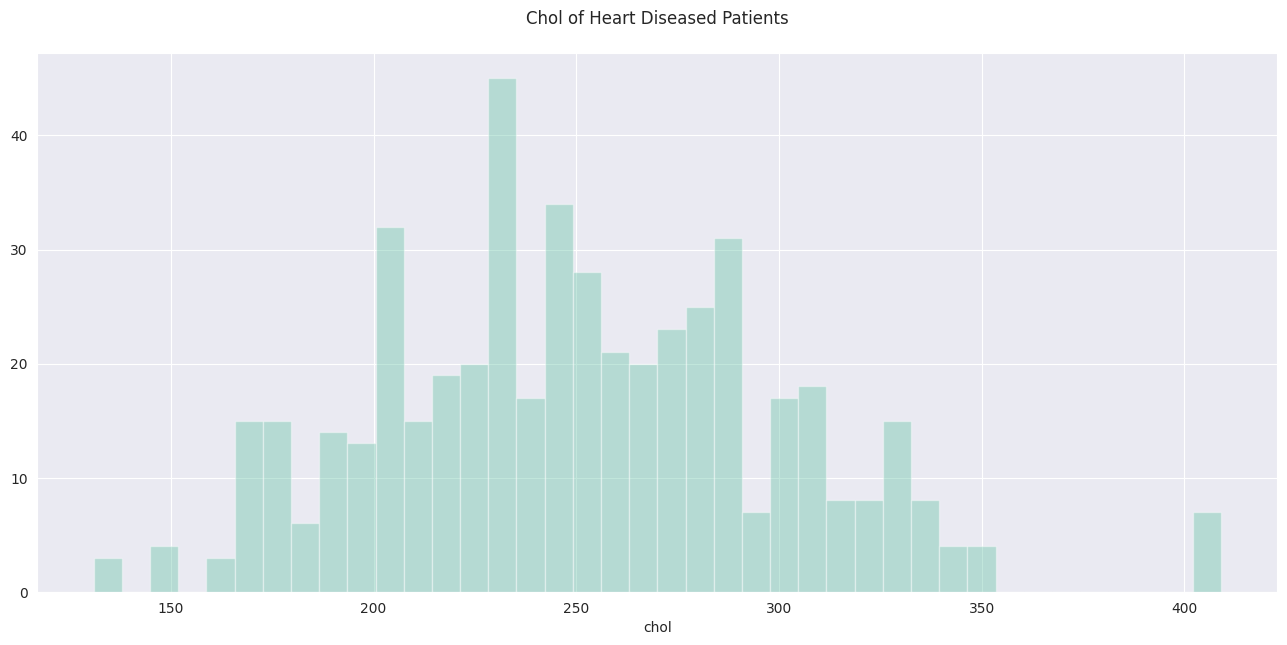

In [25]:
plt.figure(figsize=(16,7))
sns.distplot(df[df['target']==0]['chol'],kde=False,bins=40)
plt.title('Chol of Heart Diseased Patients\n')

<ipython-input-26-a4d51c4e19c6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['target']==0]['thalach'],kde=False,bins=40)


Text(0.5, 1.0, 'thalach of Heart Diseased Patients\n')

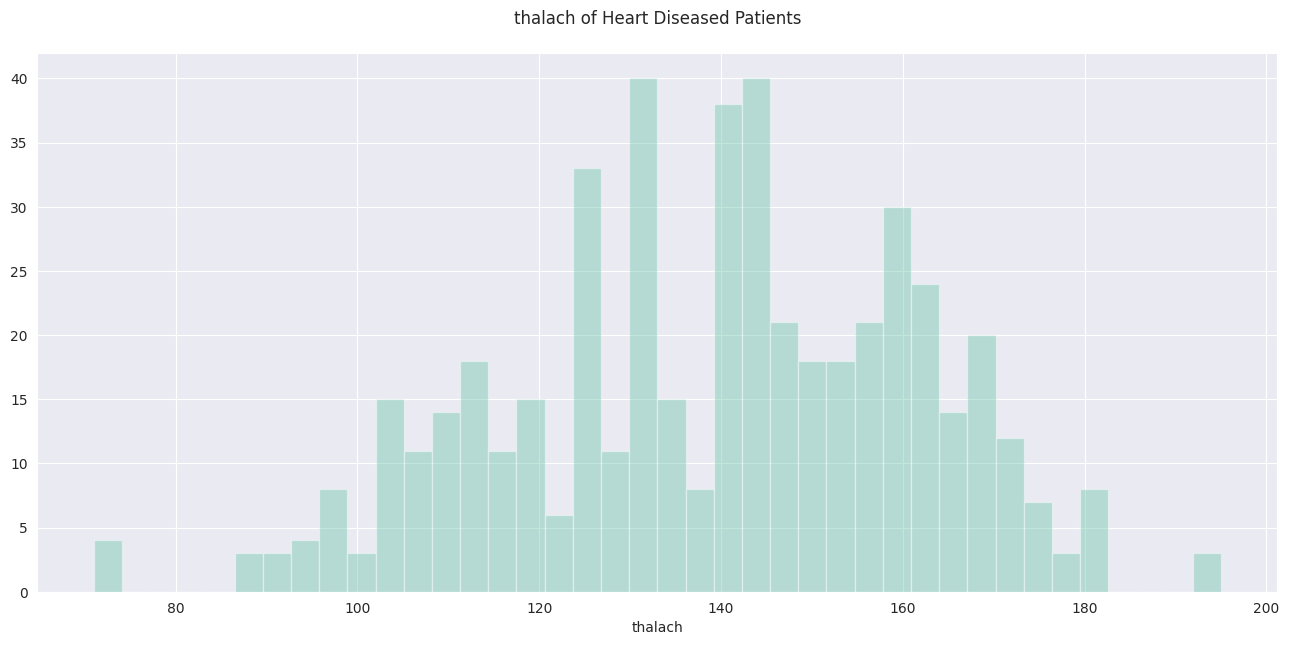

In [26]:
plt.figure(figsize=(16,7))
sns.distplot(df[df['target']==0]['thalach'],kde=False,bins=40)
plt.title('thalach of Heart Diseased Patients\n')

In [27]:
df3 = df[df['target'] == 0 ][['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']] #target 0 - people with heart disease

Age vs trestbps(Heart Diseased Patinets)


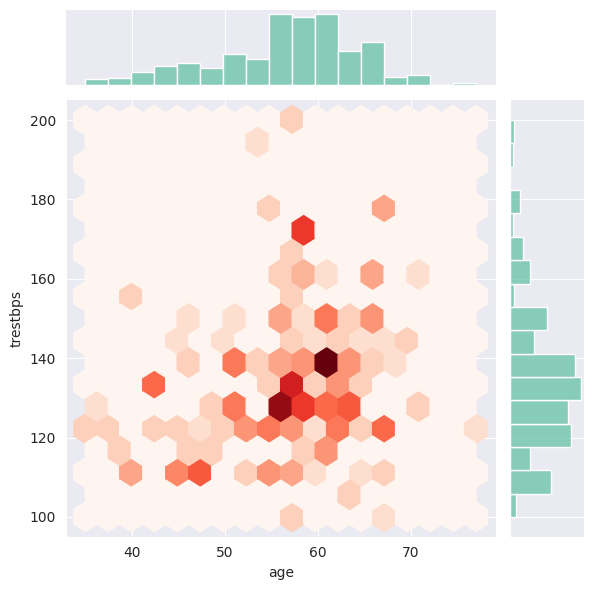

In [28]:

pal = sns.light_palette("blue", as_cmap=True)


print('Age vs trestbps(Heart Diseased Patinets)')
sns.jointplot(data=df3,
              x='age',
              y='trestbps',
              kind='hex',
              cmap='Reds'

              )

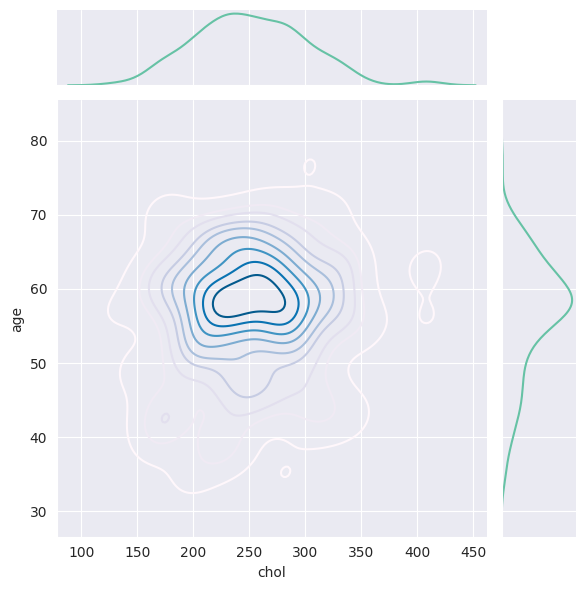

In [29]:

sns.jointplot(data=df3,
              x='chol',
              y='age',
              kind='kde',
              cmap='PuBu'
              )

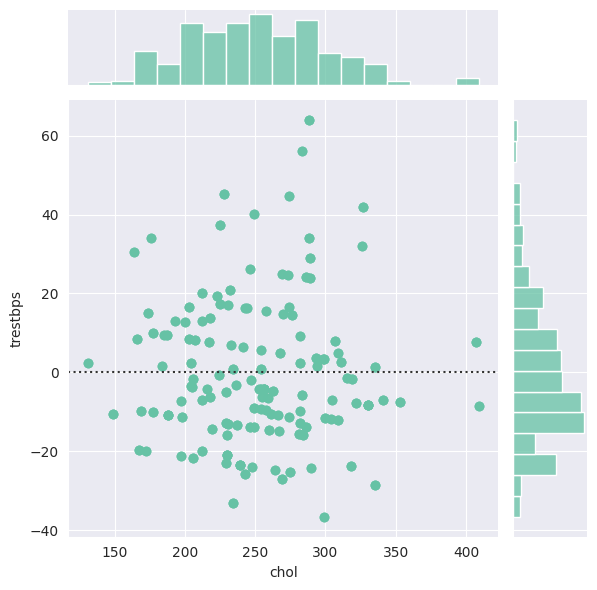

In [30]:

sns.jointplot(data=df3,
              x='chol',
              y='trestbps',
              kind='resid')


<Axes: xlabel='target', ylabel='age'>

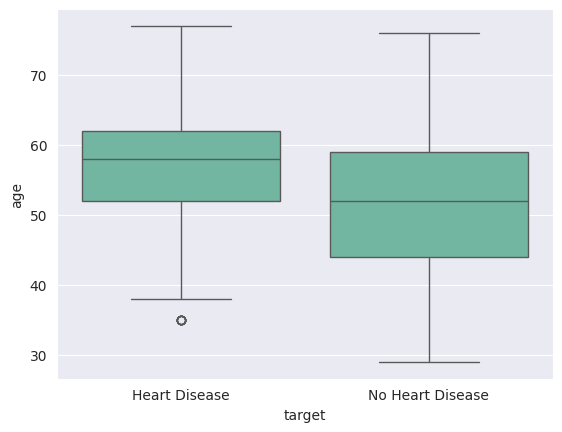

In [31]:
sns.boxplot(data=df2,x='target',y='age')

<Axes: xlabel='ca', ylabel='age'>

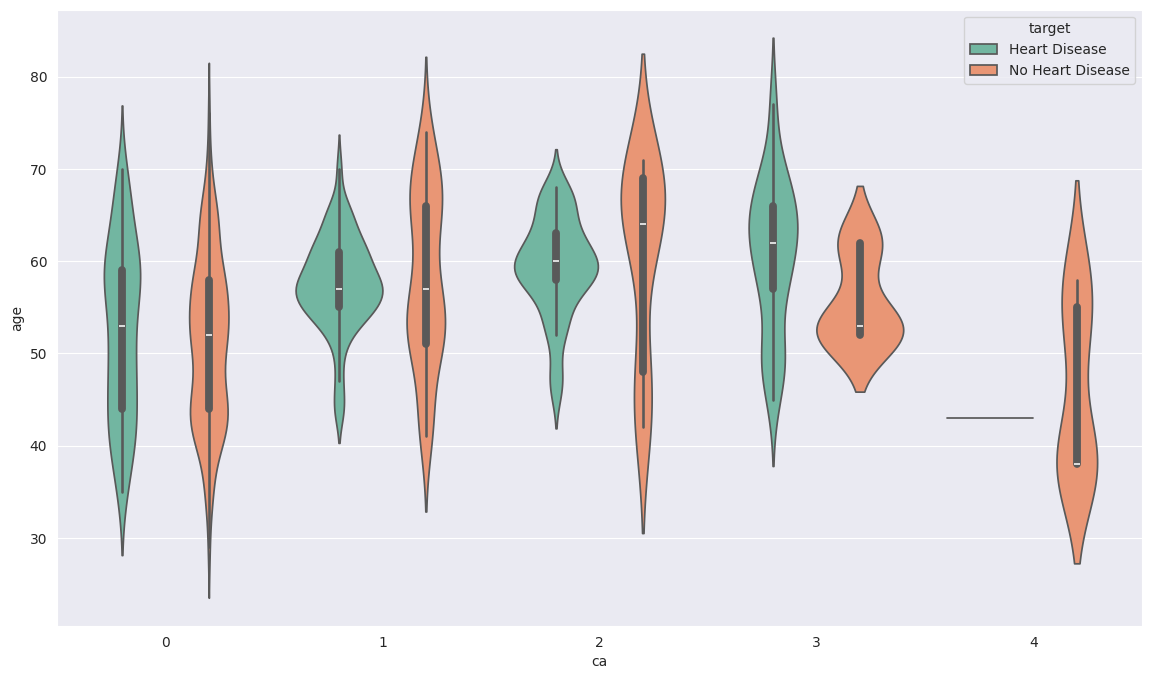

In [32]:
plt.figure(figsize=(14,8))
sns.violinplot(data=df2,x='ca',y='age',hue='target')

<Axes: xlabel='cp', ylabel='thalach'>

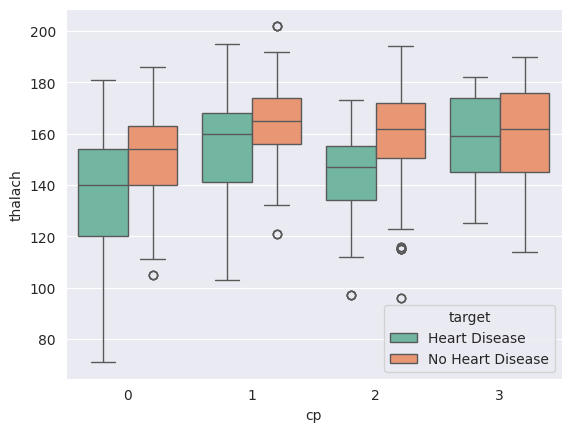

In [33]:
sns.boxplot(data=df2,x='cp',y='thalach',hue='target')

<Axes: xlabel='fbs', ylabel='trestbps'>

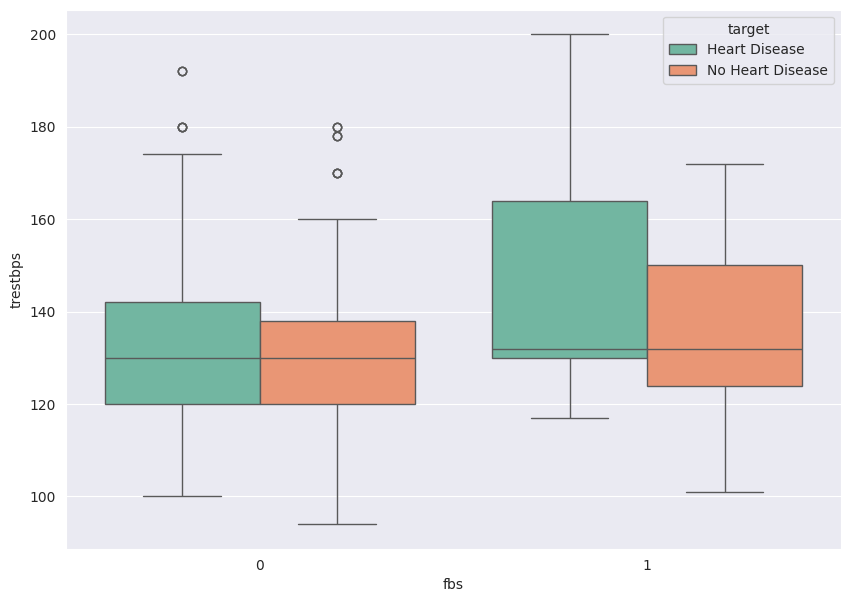

In [34]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df2,x='fbs',y='trestbps',hue='target')

<Axes: xlabel='exang', ylabel='oldpeak'>

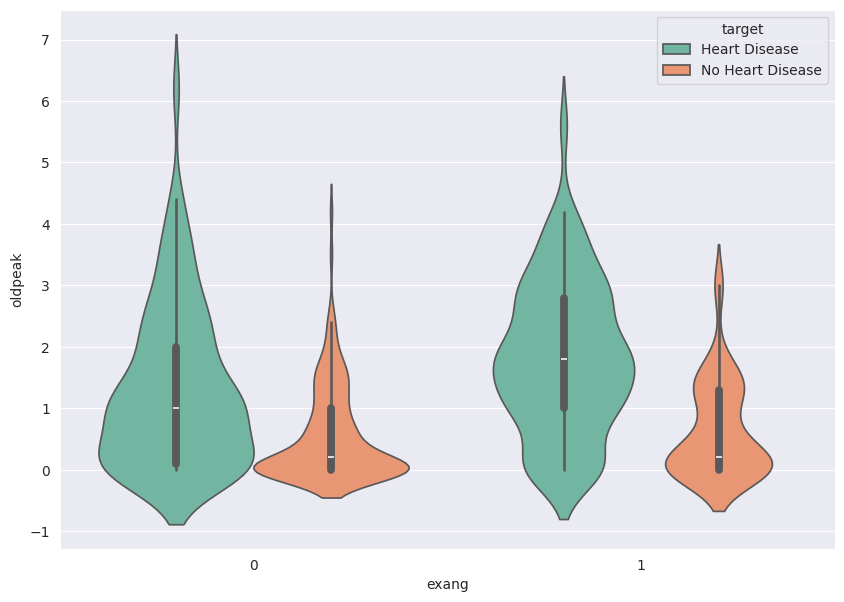

In [35]:
plt.figure(figsize=(10,7))
sns.violinplot(data=df2,x='exang',y='oldpeak',hue='target')

<Axes: xlabel='slope', ylabel='thalach'>

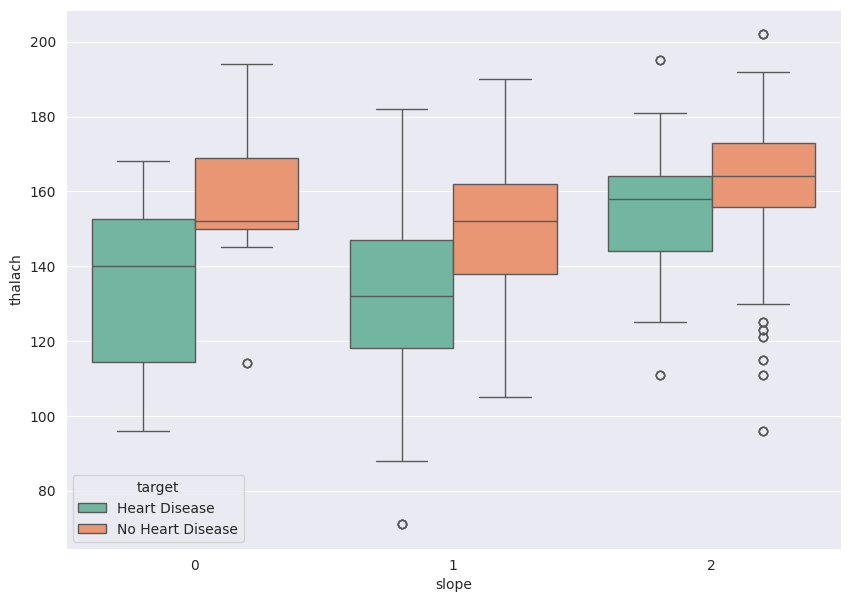

In [36]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df2,x='slope',y='thalach',hue='target')

<Axes: xlabel='thal', ylabel='oldpeak'>

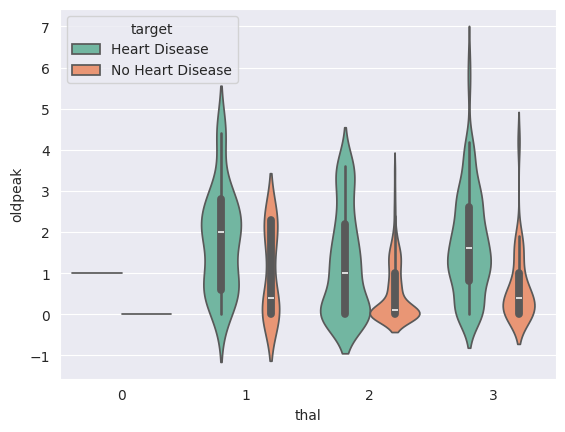

In [37]:
sns.violinplot(data=df2,x='thal',y='oldpeak',hue='target')

<Axes: xlabel='target', ylabel='thalach'>

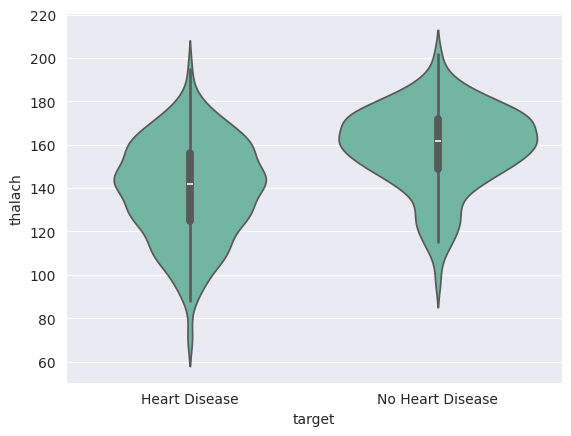

In [38]:
sns.violinplot(data=df2,x='target',y='thalach')

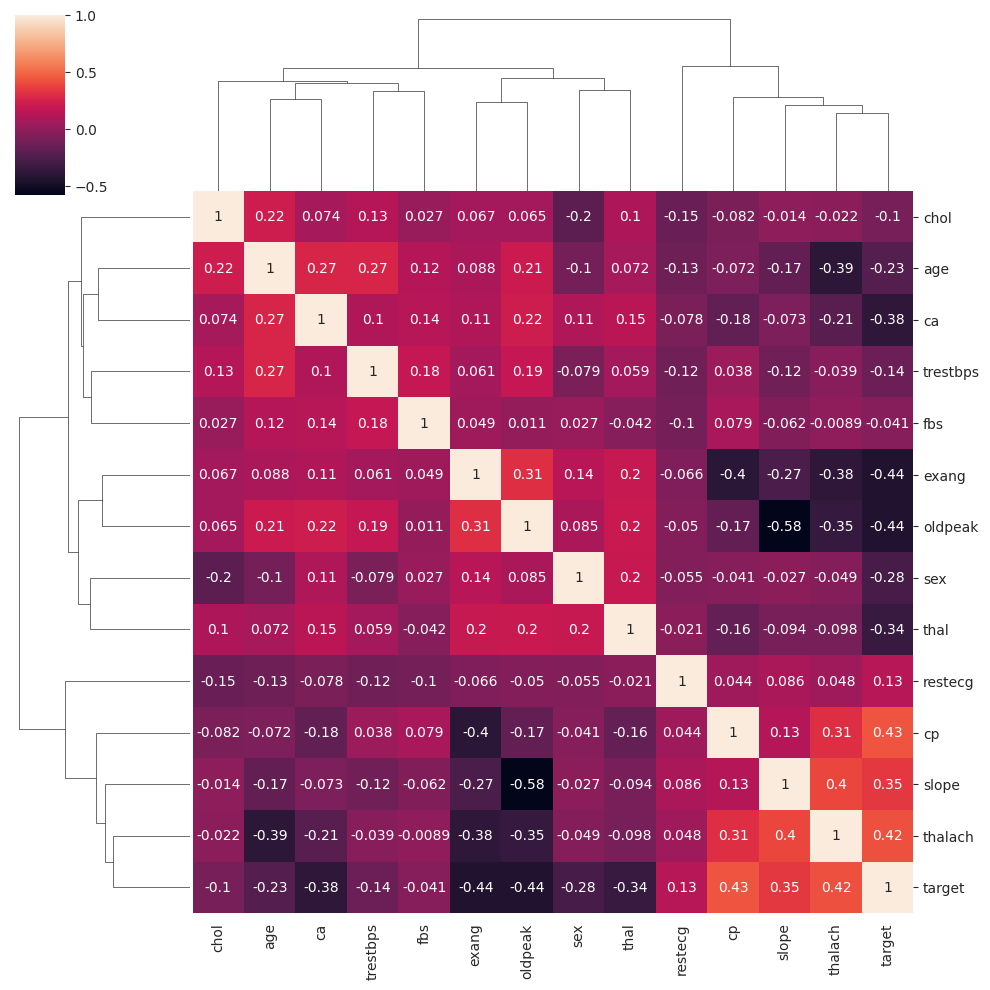

In [39]:
sns.clustermap(df.corr(),annot=True)

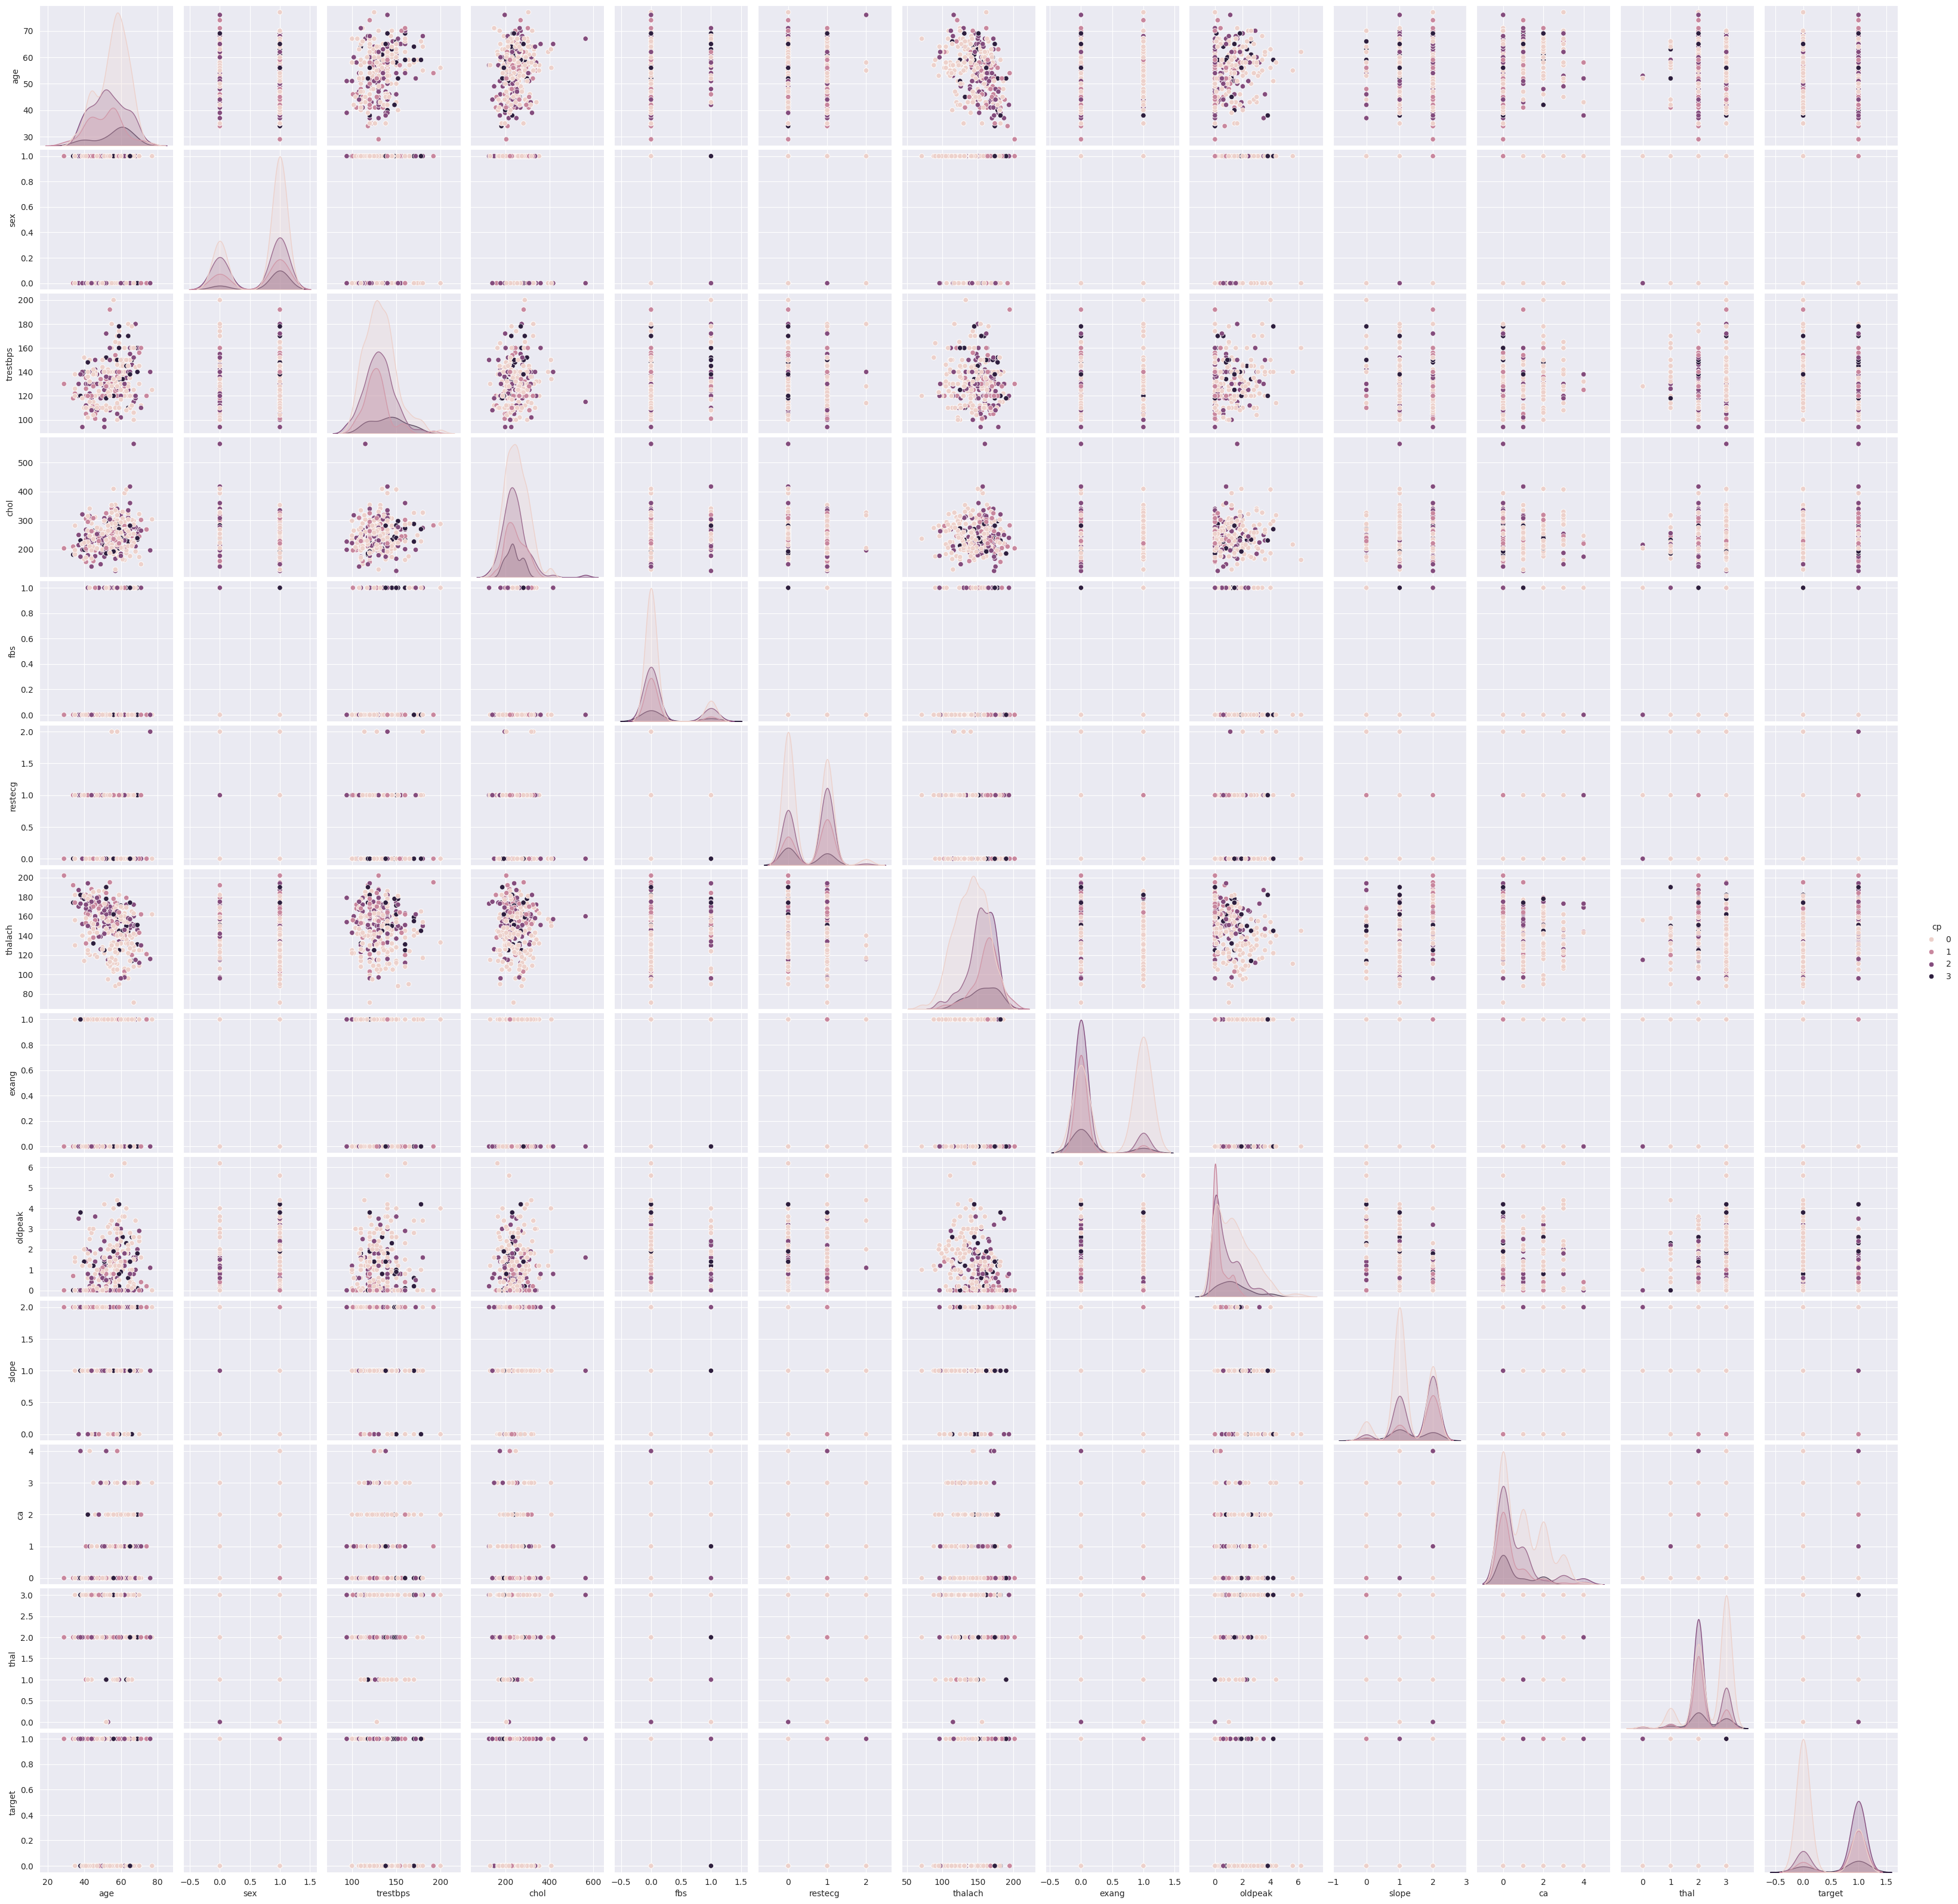

In [40]:
sns.pairplot(df,hue='cp')

In [41]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
X = df.iloc[:,0:13] # Features
y = df.iloc[:,13] # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [42]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [43]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9902597402597403


In [ ]:
feature_cols = ['age', 'sex', 'cp', 'trestbps','chol', 'fbs', 'restecg', 'thalach','exang', 'oldpeak', 'slope', 'ca', 'thal']

Accuracy: 0.9902597402597403


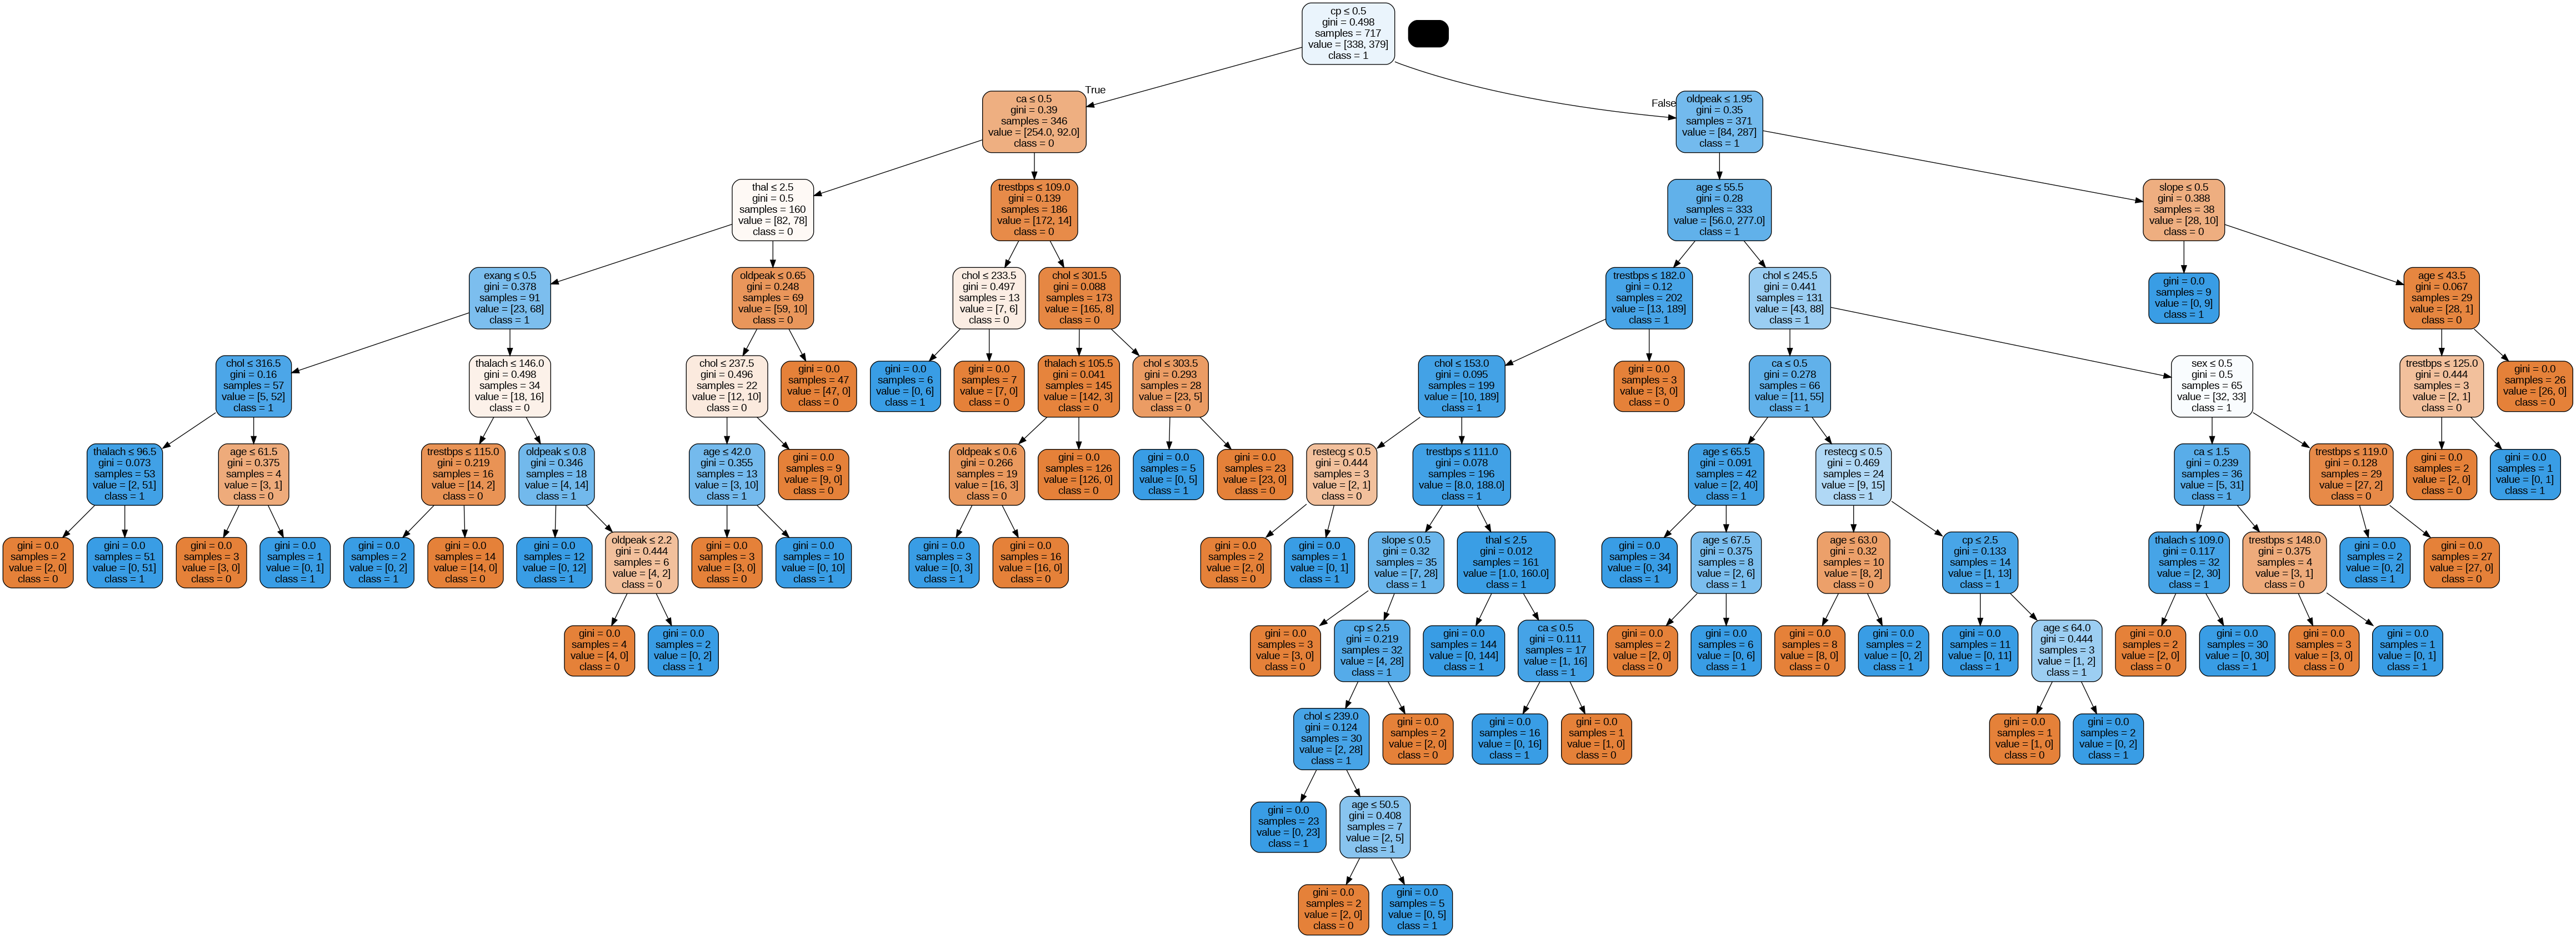

In [46]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.tree import export_graphviz
from io import StringIO # import StringIO from io instead of sklearn.externals.six
from IPython.display import Image
import pydotplus

# Define feature_cols here so it is available in the current scope
feature_cols = ['age', 'sex', 'cp', 'trestbps','chol', 'fbs', 'restecg', 'thalach','exang', 'oldpeak', 'slope', 'ca', 'thal']

X = df.iloc[:,0:13] # Features
y = df.iloc[:,13] # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols  ,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

In [47]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8246753246753247


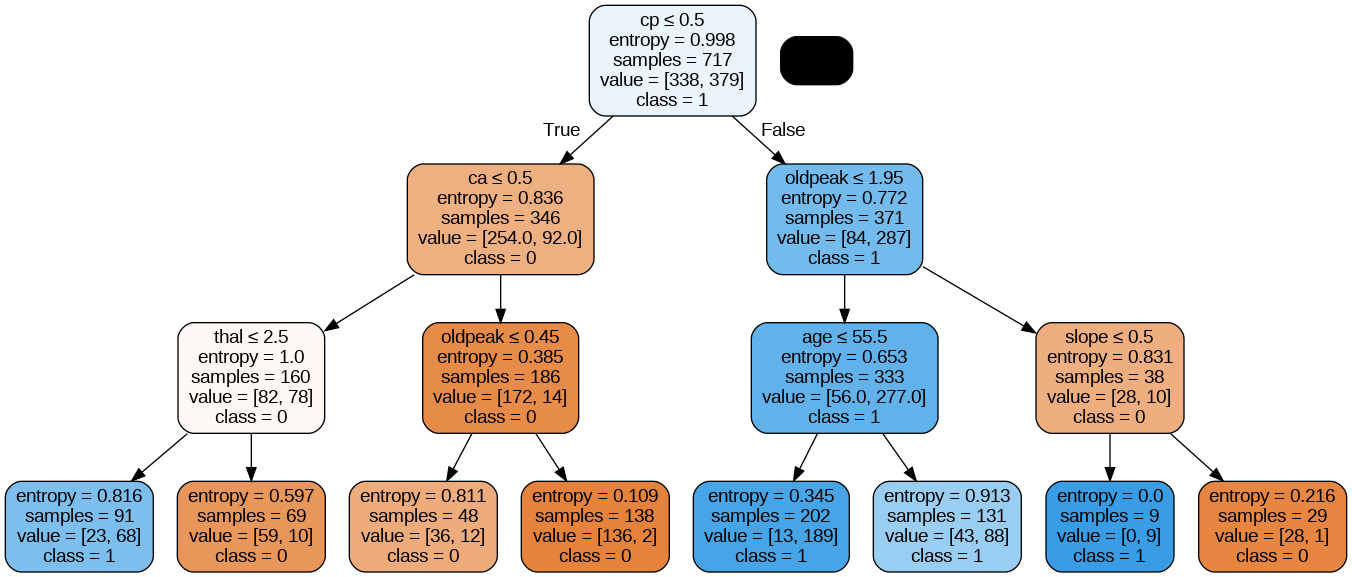

In [50]:
from io import StringIO # import StringIO from io instead of sklearn.externals.six
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

In [51]:
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg_type', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope_type', 'num_major_vessels', 'thalassemia_type', 'target']

In [53]:
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg_type', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope_type', 'num_major_vessels', 'thalassemia_type', 'target']

# Convert the columns to 'object' type before assigning strings
df['chest_pain_type'] = df['chest_pain_type'].astype(object)
df['rest_ecg_type'] = df['rest_ecg_type'].astype(object)
df['st_slope_type'] = df['st_slope_type'].astype(object)
df['thalassemia_type'] = df['thalassemia_type'].astype(object)

#cp - chest_pain_type
df.loc[df['chest_pain_type'] == 0, 'chest_pain_type'] = 'asymptomatic'
df.loc[df['chest_pain_type'] == 1, 'chest_pain_type'] = 'atypical angina'
df.loc[df['chest_pain_type'] == 2, 'chest_pain_type'] = 'non-anginal pain'
df.loc[df['chest_pain_type'] == 3, 'chest_pain_type'] = 'typical angina'

#restecg - rest_ecg_type
df.loc[df['rest_ecg_type'] == 0, 'rest_ecg_type'] = 'left ventricular hypertrophy'
df.loc[df['rest_ecg_type'] == 1, 'rest_ecg_type'] = 'normal'
df.loc[df['rest_ecg_type'] == 2, 'rest_ecg_type'] = 'ST-T wave abnormality'

#slope - st_slope_type
df.loc[df['st_slope_type'] == 0, 'st_slope_type'] = 'downsloping'
df.loc[df['st_slope_type'] == 1, 'st_slope_type'] = 'flat'
df.loc[df['st_slope_type'] == 2, 'st_slope_type'] = 'upsloping'

#thal - thalassemia_type
df.loc[df['thalassemia_type'] == 0, 'thalassemia_type'] = 'nothing'
df.loc[df['thalassemia_type'] == 1, 'thalassemia_type'] = 'fixed defect'
df.loc[df['thalassemia_type'] == 2, 'thalassemia_type'] = 'normal'
df.loc[df['thalassemia_type'] == 3, 'thalassemia_type'] = 'reversable defect'

In [ ]:
data = pd.get_dummies(df, drop_first=False)
data.columns

Index(['age', 'sex', 'resting_blood_pressure', 'cholesterol',
       'fasting_blood_sugar', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'num_major_vessels',
       'target', 'chest_pain_type_asymptomatic',
       'chest_pain_type_atypical angina', 'chest_pain_type_non-anginal pain',
       'chest_pain_type_typical angina', 'rest_ecg_type_ST-T wave abnormality',
       'rest_ecg_type_left ventricular hypertrophy', 'rest_ecg_type_normal',
       'st_slope_type_downsloping', 'st_slope_type_flat',
       'st_slope_type_upsloping', 'thalassemia_type_fixed defect',
       'thalassemia_type_normal', 'thalassemia_type_nothing',
       'thalassemia_type_reversable defect'],
      dtype='object')

In [56]:
# Get the dummy variables and avoid dropping the first category
data = pd.get_dummies(df, drop_first=False)

# Get the "thalassemia_type_fixed defect" column from the dataframe
df_temp = data['thalassemia_type_fixed defect']

In [57]:
data = pd.get_dummies(df, drop_first=True)

In [58]:
data.head()

age  sex  resting_blood_pressure  cholesterol  fasting_blood_sugar  \
0   52    1                     125          212                    0   
1   53    1                     140          203                    1   
2   70    1                     145          174                    0   
3   61    1                     148          203                    0   
4   62    0                     138          294                    1   

   max_heart_rate_achieved  exercise_induced_angina  st_depression  \
0                      168                        0            1.0   
1                      155                        1            3.1   
2                      125                        1            2.6   
3                      161                        0            0.0   
4                      106                        0            1.9   

   num_major_vessels  target  chest_pain_type_atypical angina  \
0                  2       0                            False   
1                  0       0                            False   
2                  0       0                            False   
3                  1       0                            False   
4                  3       0                            False   

   chest_pain_type_non-anginal pain  chest_pain_type_typical angina  \
0                             False                           False   
1                             False                           False   
2                             False                           False   
3                             False                           False   
4                             False                           False   

   rest_ecg_type_left ventricular hypertrophy  rest_ecg_type_normal  \
0                                       False                  True   
1                                        True                 False   
2                                       False                  True   
3                                       False                  True   
4                                       False                  True   

   st_slope_type_flat  st_slope_type_upsloping  thalassemia_type_normal  \
0               False                     True                    False   
1               False                    False                    False   
2               False                    False                    False   
3               False                     True                    False   
4                True                    False                     True   

   thalassemia_type_nothing  thalassemia_type_reversable defect  
0                     False                                True  
1                     False                                True  
2                     False                                True  
3                     False                                True  
4                     False                               False

In [59]:
frames = [data, df_temp]
result = pd.concat(frames,axis=1)

result.head()

age  sex  resting_blood_pressure  cholesterol  fasting_blood_sugar  \
0   52    1                     125          212                    0   
1   53    1                     140          203                    1   
2   70    1                     145          174                    0   
3   61    1                     148          203                    0   
4   62    0                     138          294                    1   

   max_heart_rate_achieved  exercise_induced_angina  st_depression  \
0                      168                        0            1.0   
1                      155                        1            3.1   
2                      125                        1            2.6   
3                      161                        0            0.0   
4                      106                        0            1.9   

   num_major_vessels  target  ...  chest_pain_type_non-anginal pain  \
0                  2       0  ...                             False   
1                  0       0  ...                             False   
2                  0       0  ...                             False   
3                  1       0  ...                             False   
4                  3       0  ...                             False   

   chest_pain_type_typical angina  rest_ecg_type_left ventricular hypertrophy  \
0                           False                                       False   
1                           False                                        True   
2                           False                                       False   
3                           False                                       False   
4                           False                                       False   

   rest_ecg_type_normal  st_slope_type_flat  st_slope_type_upsloping  \
0                  True               False                     True   
1                 False               False                    False   
2                  True               False                    False   
3                  True               False                     True   
4                  True                True                    False   

   thalassemia_type_normal  thalassemia_type_nothing  \
0                    False                     False   
1                    False                     False   
2                    False                     False   
3                    False                     False   
4                     True                     False   

   thalassemia_type_reversable defect  thalassemia_type_fixed defect  
0                                True                          False  
1                                True                          False  
2                                True                          False  
3                                True                          False  
4                               False                          False  

[5 rows x 21 columns]

In [60]:
result.drop('thalassemia_type_nothing',axis=1,inplace=True)
resultc = result.copy()

In [61]:
result.columns

Index(['age', 'sex', 'resting_blood_pressure', 'cholesterol',
       'fasting_blood_sugar', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'num_major_vessels',
       'target', 'chest_pain_type_atypical angina',
       'chest_pain_type_non-anginal pain', 'chest_pain_type_typical angina',
       'rest_ecg_type_left ventricular hypertrophy', 'rest_ecg_type_normal',
       'st_slope_type_flat', 'st_slope_type_upsloping',
       'thalassemia_type_normal', 'thalassemia_type_reversable defect',
       'thalassemia_type_fixed defect'],
      dtype='object')

In [62]:
X = result.drop('target', axis = 1)


In [63]:
y = result['target']

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
logre = LogisticRegression()

In [68]:
logre.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [69]:
y_pred = logre.predict(X_test)

In [70]:
actual = []
predcition = []

for i,j in zip(y_test,y_pred):
  actual.append(i)
  predcition.append(j)

dic = {'Actual':actual,
       'Prediction':predcition
       }

In [71]:
result  = pd.DataFrame(dic)

In [72]:
import plotly.graph_objects as go

fig = go.Figure()


fig.add_trace(go.Scatter(x=np.arange(0,len(y_test)), y=y_test,
                    mode='markers+lines',
                    name='Test'))
fig.add_trace(go.Scatter(x=np.arange(0,len(y_test)), y=y_pred,
                    mode='markers',
                    name='Pred'))

In [73]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.848780487804878


In [74]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.80      0.83        98
           1       0.83      0.90      0.86       107

    accuracy                           0.85       205
   macro avg       0.85      0.85      0.85       205
weighted avg       0.85      0.85      0.85       205



[[78 20]
 [11 96]]


<Axes: >

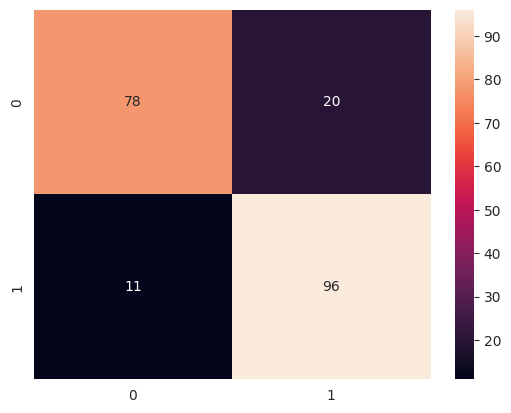

In [75]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

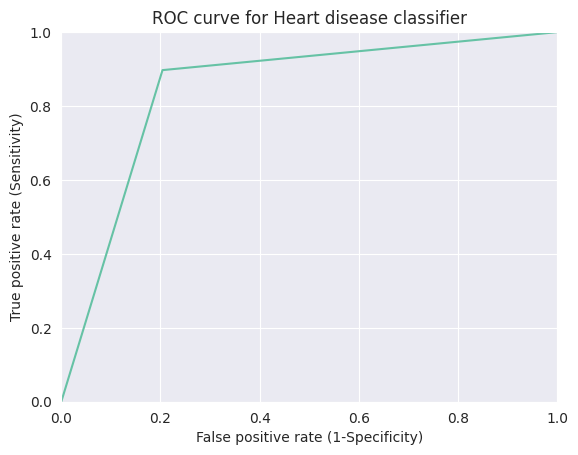

In [76]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart disease classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

In [77]:
import sklearn
sklearn.metrics.roc_auc_score(y_test,y_pred)

np.float64(0.8465573145145909)

In [78]:
print(logre.intercept_)
plt.figure(figsize=(10,12))
coeffecients = pd.DataFrame(logre.coef_.ravel(),X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients.sort_values(by=['Coeffecient'],inplace=True,ascending=False)
coeffecients

[-0.02267318]


Coeffecient
chest_pain_type_non-anginal pain               1.559528
chest_pain_type_typical angina                 0.801889
chest_pain_type_atypical angina                0.485285
thalassemia_type_normal                        0.458032
rest_ecg_type_normal                           0.434063
thalassemia_type_fixed defect                  0.273255
fasting_blood_sugar                            0.236971
st_slope_type_upsloping                        0.163838
max_heart_rate_achieved                        0.023213
age                                            0.008602
cholesterol                                   -0.004163
resting_blood_pressure                        -0.008840
rest_ecg_type_left ventricular hypertrophy    -0.391459
st_slope_type_flat                            -0.397197
st_depression                                 -0.532218
thalassemia_type_reversable defect            -0.639451
num_major_vessels                             -0.709426
exercise_induced_angina                       -1.064322
sex                                           -1.230540

<Figure size 1000x1200 with 0 Axes>

In [79]:
df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg_type',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope_type', 'num_major_vessels', 'thalassemia_type', 'target'],
      dtype='object')

<Axes: xlabel='max_heart_rate_achieved', ylabel='Count'>

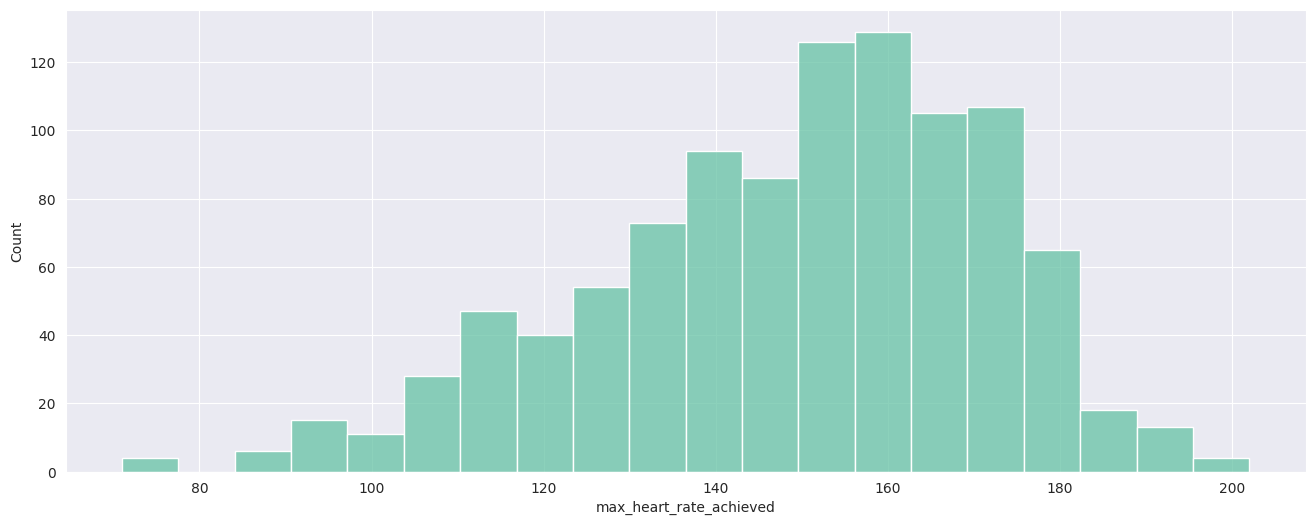

In [82]:
plt.figure(figsize=(16,6))
sns.histplot(df['max_heart_rate_achieved']) # Replace distplot with histplot

<Axes: xlabel='rest_ecg_type', ylabel='cholesterol'>

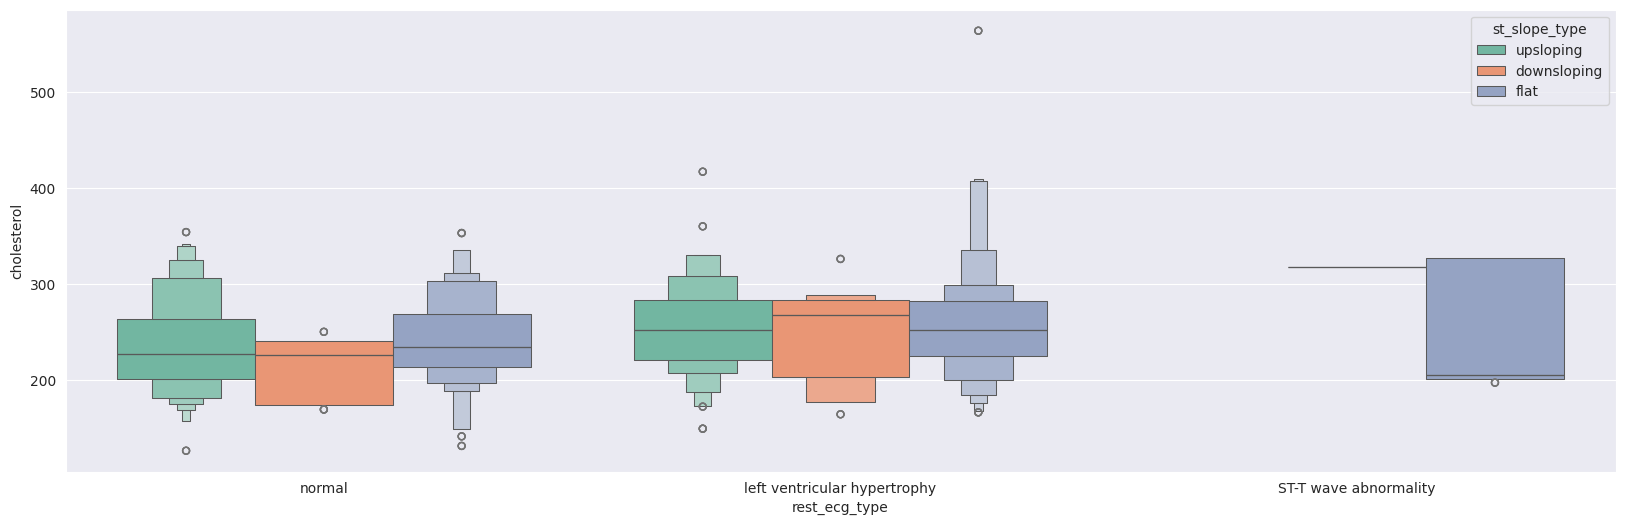

In [84]:
plt.figure(figsize=(20,6))
sns.boxenplot(data=df,x='rest_ecg_type',y='cholesterol',hue='st_slope_type') # Changed df4 to df

<Axes: xlabel='chest_pain_type', ylabel='max_heart_rate_achieved'>

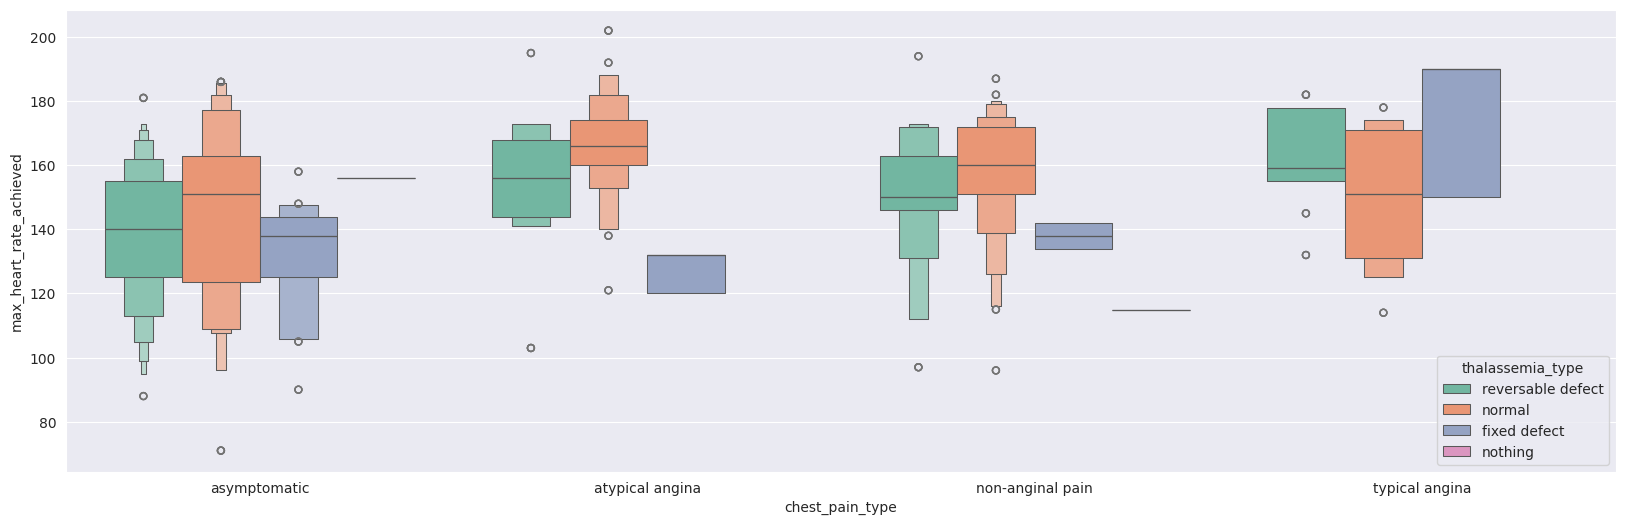

In [86]:
plt.figure(figsize=(20,6))
sns.boxenplot(data=df,x='chest_pain_type',y='max_heart_rate_achieved',hue='thalassemia_type') # Changed df4 to df